# Function fitting with a photonic quantum neural networks

**References**
1. [PennyLane tutorial](https://pennylane.ai/qml/demos/quantum_neural_net.html)
2. [PennyLane-SF Installation](https://docs.pennylane.ai/projects/strawberryfields/en/latest/installation.html)

In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer

**References**

1. [PennyLane-SF Docs | The Fock Device](https://docs.pennylane.ai/projects/strawberryfields/en/stable/devices/fock.html)
2. [Wikipedia | Fock state](https://en.wikipedia.org/wiki/Fock_state)
3. [Wikipedia | Quantum vacuum state](https://en.wikipedia.org/wiki/Quantum_vacuum_state)
4. [PennyLane API Docs | qml.Displacement](https://docs.pennylane.ai/en/stable/code/api/pennylane.Displacement.html)
5. [PennyLane API Docs | qml.Beamsplitter](https://docs.pennylane.ai/en/stable/code/api/pennylane.Beamsplitter.html)

In [2]:
# Any continuous-variable operation can be represented by the Fock device,
# but the simulations are approximations, whose accuracy increases with the cutoff_dim.
# cutoff_dim also basically limits the dimension of the Hilbert space.
test_dev = qml.device("strawberryfields.fock", wires=2, cutoff_dim=10)

@qml.qnode(test_dev)
def test_quantum_function(x, theta):
    qml.Displacement(x, 0, wires=0)
    qml.Beamsplitter(theta, 0, wires=[0, 1])
    return qml.expval(qml.NumberOperator(0))

test_quantum_function(1., 0.543)

tensor(0.73301326, requires_grad=True)

In [3]:
dqfunc = qml.grad(test_quantum_function, argnum=0)
dqfunc(1., 0.543)

1.4660265156190508

In [4]:
dev = qml.device("strawberryfields.fock", wires=1, cutoff_dim=10)

In [5]:
def layer(v):
    # Matrix multiplication of input layer
    qml.Rotation(v[0], wires=0)
    qml.Squeezing(v[1], 0.0, wires=0)
    qml.Rotation(v[2], wires=0)

    # Bias
    qml.Displacement(v[3], 0.0, wires=0)

    # Element-wise nonlinear transformation
    qml.Kerr(v[4], wires=0)

In [6]:
@qml.qnode(dev)
def quantum_neural_net(var, x):
    # Encode input x into quantum state
    qml.Displacement(x, 0.0, wires=0)

    # "layer" subcircuits
    for v in var:
        layer(v)

    return qml.expval(qml.X(0))

In [7]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

In [8]:
def cost(var, features, labels):
    preds = [quantum_neural_net(var, x) for x in features]
    return square_loss(labels, preds)

In [9]:
data = np.loadtxt("sine.txt")
X = np.array(data[:, 0], requires_grad=False)
Y = np.array(data[:, 1], requires_grad=False)

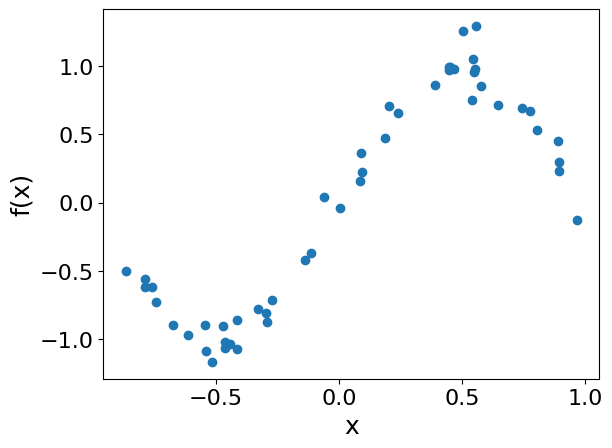

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X, Y)
plt.xlabel("x", fontsize=18)
plt.ylabel("f(x)", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.show()

In [11]:
np.random.seed(0)
num_layers = 4
var_init = 0.05 * np.random.randn(num_layers, 5, requires_grad=True)
print(var_init)

[[ 0.08820262  0.02000786  0.0489369   0.11204466  0.0933779 ]
 [-0.04886389  0.04750442 -0.00756786 -0.00516094  0.02052993]
 [ 0.00720218  0.07271368  0.03805189  0.00608375  0.02219316]
 [ 0.01668372  0.07470395 -0.01025791  0.01565339 -0.04270479]]


**References**

1. [Machine Learning Mastery | Gentle Introduction to the Adam Optimization Algorithm for Deep Learning](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
2. [Adam: A Method for Stochastic Optimzation](https://arxiv.org/pdf/1412.6980.pdf)

In [12]:
opt = AdamOptimizer(0.01, beta1=0.9, beta2=0.999)

var = var_init
for it in range(500):
    (var, _, _), _cost = opt.step_and_cost(cost, var, X, Y)
    print(f"Iter: {it:5d} | Cost: {_cost:0.7f} ")

Iter:     0 | Cost: 0.3006065 
Iter:     1 | Cost: 0.2103589 
Iter:     2 | Cost: 0.1591662 
Iter:     3 | Cost: 0.1547870 
Iter:     4 | Cost: 0.1703646 
Iter:     5 | Cost: 0.1728650 
Iter:     6 | Cost: 0.1619023 
Iter:     7 | Cost: 0.1470893 
Iter:     8 | Cost: 0.1356482 
Iter:     9 | Cost: 0.1296825 
Iter:    10 | Cost: 0.1270449 
Iter:    11 | Cost: 0.1240814 
Iter:    12 | Cost: 0.1181421 
Iter:    13 | Cost: 0.1086773 
Iter:    14 | Cost: 0.0972896 
Iter:    15 | Cost: 0.0870073 
Iter:    16 | Cost: 0.0806308 
Iter:    17 | Cost: 0.0786671 
Iter:    18 | Cost: 0.0786830 
Iter:    19 | Cost: 0.0773620 
Iter:    20 | Cost: 0.0732582 
Iter:    21 | Cost: 0.0674099 
Iter:    22 | Cost: 0.0619462 
Iter:    23 | Cost: 0.0583516 
Iter:    24 | Cost: 0.0565535 
Iter:    25 | Cost: 0.0552671 
Iter:    26 | Cost: 0.0532024 
Iter:    27 | Cost: 0.0500662 
Iter:    28 | Cost: 0.0466037 
Iter:    29 | Cost: 0.0438561 
Iter:    30 | Cost: 0.0423356 
Iter:    31 | Cost: 0.0417197 
Iter:   

In [13]:
x_pred = np.linspace(-1, 1, 50)
predictions = [quantum_neural_net(var, x_) for x_ in x_pred]

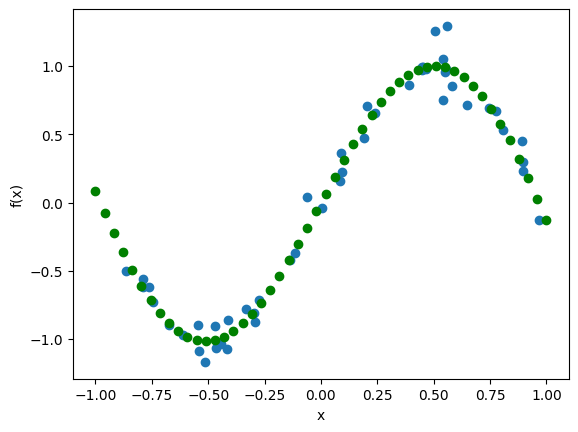

In [14]:
plt.figure()
plt.scatter(X, Y)
plt.scatter(x_pred, predictions, color="green")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.show()

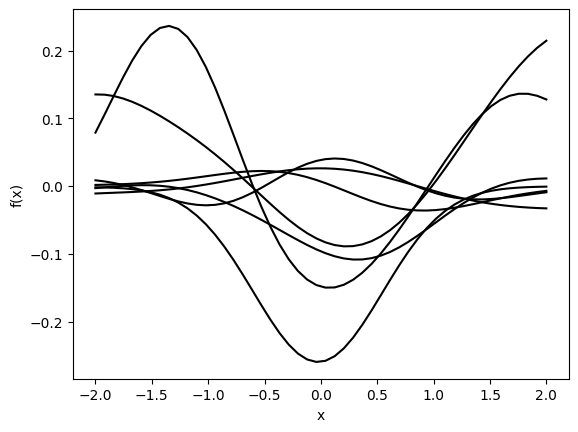

In [15]:
variance = 1.0

plt.figure()
x_pred = np.linspace(-2, 2, 50)
for i in range(7):
    rnd_var = variance * np.random.randn(num_layers, 7)
    predictions = [quantum_neural_net(rnd_var, x_) for x_ in x_pred]
    plt.plot(x_pred, predictions, color="black")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.show()